In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML (1)/spam_or_not_spam.csv")
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [ ]:
df["char_count"] = df["email"].astype(str).apply(len)
df["word_count"] = df["email"].astype(str).apply(lambda x: len(x.split()))
df["avg_word_len"] = df["email"].astype(str).apply(
    lambda x: np.mean([len(w) for w in x.split()]) if len(x.split()) > 0 else 0
)
df["digit_count"] = df["email"].astype(str).apply(lambda x: sum(ch.isdigit() for ch in x))
df["special_count"] = df["email"].astype(str).apply(
    lambda x: sum(not ch.isalnum() and ch != " " for ch in x)
)

# Target
X = df[["char_count", "word_count", "avg_word_len", "digit_count", "special_count"]]
y = df["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy:", acc)


Accuracy: 0.84


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[501   4]
 [ 92   3]]


In [ ]:
sample = "Win free cash now!!!"
sample_features = pd.DataFrame({
    "char_count": [len(sample)],
    "word_count": [len(sample.split())],
    "avg_word_len": [np.mean([len(w) for w in sample.split()])],
    "digit_count": [sum(ch.isdigit() for ch in sample)],
    "special_count": [sum(not ch.isalnum() and ch != " " for ch in sample)]
})

prediction = model.predict(sample_features)[0]
print("\nSample Message Prediction:", "SPAM" if prediction == 1 else "NOT SPAM")


Sample Message Prediction: NOT SPAM


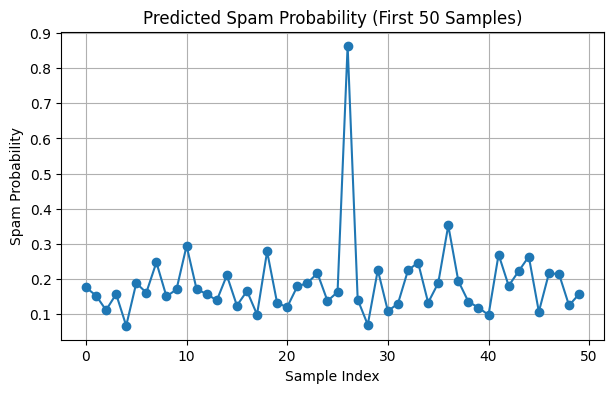

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:,1]  # probability of spam

plt.figure(figsize=(7,4))
plt.plot(y_pred_prob[:50], marker='o')
plt.title("Predicted Spam Probability (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Spam Probability")
plt.grid(True)
plt.show()